## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [9]:
"""
Compile 模型
"""
optimizer = keras.optimizers.sgd(lr=0.01, momentum=0.1, decay=0.1)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 21s 417us/step - loss: 2.1896 - acc: 0.2175 - val_loss: 2.1499 - val_acc: 0.2475
Epoch 2/500
50000/50000 [==============================] - 15s 310us/step - loss: 2.1375 - acc: 0.2507 - val_loss: 2.1262 - val_acc: 0.2562
Epoch 3/500
50000/50000 [==============================] - 15s 301us/step - loss: 2.1203 - acc: 0.2572 - val_loss: 2.1132 - val_acc: 0.2622
Epoch 4/500
50000/50000 [==============================] - 15s 303us/step - loss: 2.1097 - acc: 0.2614 - val_loss: 2.1044 - val_acc: 0.2660
Epoch 5/500
50000/50000 [==============================] - 15s 305us/step - loss: 2.1021 - acc: 0.2644 - val_loss: 2.0976 - val_acc: 0.2675
Epoch 6/500
50000/50000 [==============================] - 16s 315us/step - loss: 2.0961 - acc: 0.2665 - val_loss: 2.0923 - val_acc: 0.2722
Epoch 7/500
50000/50000 [==============================] - 15s

Epoch 57/500
50000/50000 [==============================] - 11s 223us/step - loss: 2.0375 - acc: 0.2896 - val_loss: 2.0356 - val_acc: 0.2917
Epoch 58/500
50000/50000 [==============================] - 11s 223us/step - loss: 2.0371 - acc: 0.2898 - val_loss: 2.0352 - val_acc: 0.2915
Epoch 59/500
50000/50000 [==============================] - 11s 224us/step - loss: 2.0368 - acc: 0.2898 - val_loss: 2.0348 - val_acc: 0.2917
Epoch 60/500
50000/50000 [==============================] - 11s 226us/step - loss: 2.0364 - acc: 0.2900 - val_loss: 2.0344 - val_acc: 0.2918
Epoch 61/500
50000/50000 [==============================] - 11s 228us/step - loss: 2.0361 - acc: 0.2903 - val_loss: 2.0341 - val_acc: 0.2919
Epoch 62/500
50000/50000 [==============================] - 11s 228us/step - loss: 2.0357 - acc: 0.2904 - val_loss: 2.0337 - val_acc: 0.2922
Epoch 63/500
50000/50000 [==============================] - 12s 230us/step - loss: 2.0354 - acc: 0.2905 - val_loss: 2.0334 - val_acc: 0.2924
Epoch 64/500


50000/50000 [==============================] - 13s 262us/step - loss: 2.0230 - acc: 0.2956 - val_loss: 2.0212 - val_acc: 0.2969
Epoch 115/500
50000/50000 [==============================] - 12s 238us/step - loss: 2.0228 - acc: 0.2958 - val_loss: 2.0210 - val_acc: 0.2970
Epoch 116/500
50000/50000 [==============================] - 12s 237us/step - loss: 2.0226 - acc: 0.2959 - val_loss: 2.0208 - val_acc: 0.2971
Epoch 117/500
50000/50000 [==============================] - 12s 236us/step - loss: 2.0225 - acc: 0.2960 - val_loss: 2.0206 - val_acc: 0.2973
Epoch 118/500
50000/50000 [==============================] - 12s 236us/step - loss: 2.0223 - acc: 0.2960 - val_loss: 2.0205 - val_acc: 0.2975
Epoch 119/500
50000/50000 [==============================] - 12s 237us/step - loss: 2.0221 - acc: 0.2961 - val_loss: 2.0203 - val_acc: 0.2973
Epoch 120/500
50000/50000 [==============================] - 12s 235us/step - loss: 2.0220 - acc: 0.2962 - val_loss: 2.0201 - val_acc: 0.2975
Epoch 121/500
50000/

50000/50000 [==============================] - 12s 240us/step - loss: 2.0150 - acc: 0.2986 - val_loss: 2.0132 - val_acc: 0.3006
Epoch 172/500
50000/50000 [==============================] - 12s 235us/step - loss: 2.0149 - acc: 0.2987 - val_loss: 2.0131 - val_acc: 0.3003
Epoch 173/500
50000/50000 [==============================] - 12s 238us/step - loss: 2.0148 - acc: 0.2987 - val_loss: 2.0130 - val_acc: 0.3002
Epoch 174/500
50000/50000 [==============================] - 12s 236us/step - loss: 2.0147 - acc: 0.2988 - val_loss: 2.0129 - val_acc: 0.3003
Epoch 175/500
50000/50000 [==============================] - 12s 235us/step - loss: 2.0146 - acc: 0.2989 - val_loss: 2.0128 - val_acc: 0.3002
Epoch 176/500
50000/50000 [==============================] - 12s 236us/step - loss: 2.0144 - acc: 0.2990 - val_loss: 2.0127 - val_acc: 0.3004
Epoch 177/500
50000/50000 [==============================] - 12s 236us/step - loss: 2.0143 - acc: 0.2991 - val_loss: 2.0126 - val_acc: 0.3007
Epoch 178/500
50000/

Epoch 229/500
50000/50000 [==============================] - 12s 232us/step - loss: 2.0095 - acc: 0.3002 - val_loss: 2.0077 - val_acc: 0.3017
Epoch 230/500
50000/50000 [==============================] - 12s 232us/step - loss: 2.0094 - acc: 0.3001 - val_loss: 2.0076 - val_acc: 0.3017
Epoch 231/500
50000/50000 [==============================] - 12s 233us/step - loss: 2.0093 - acc: 0.3001 - val_loss: 2.0076 - val_acc: 0.3017
Epoch 232/500
50000/50000 [==============================] - 12s 232us/step - loss: 2.0093 - acc: 0.3001 - val_loss: 2.0075 - val_acc: 0.3017
Epoch 233/500
50000/50000 [==============================] - 12s 234us/step - loss: 2.0092 - acc: 0.3001 - val_loss: 2.0074 - val_acc: 0.3017
Epoch 234/500
50000/50000 [==============================] - 12s 232us/step - loss: 2.0091 - acc: 0.3002 - val_loss: 2.0073 - val_acc: 0.3016
Epoch 235/500
50000/50000 [==============================] - 12s 234us/step - loss: 2.0090 - acc: 0.3002 - val_loss: 2.0072 - val_acc: 0.3016
Epoch 

50000/50000 [==============================] - 12s 249us/step - loss: 2.0054 - acc: 0.3013 - val_loss: 2.0037 - val_acc: 0.3032
Epoch 287/500
50000/50000 [==============================] - 13s 250us/step - loss: 2.0054 - acc: 0.3014 - val_loss: 2.0036 - val_acc: 0.3032
Epoch 288/500
50000/50000 [==============================] - 12s 248us/step - loss: 2.0053 - acc: 0.3015 - val_loss: 2.0035 - val_acc: 0.3031
Epoch 289/500
50000/50000 [==============================] - 12s 245us/step - loss: 2.0053 - acc: 0.3014 - val_loss: 2.0035 - val_acc: 0.3031
Epoch 290/500
50000/50000 [==============================] - 12s 246us/step - loss: 2.0052 - acc: 0.3015 - val_loss: 2.0034 - val_acc: 0.3031
Epoch 291/500
50000/50000 [==============================] - 13s 251us/step - loss: 2.0051 - acc: 0.3015 - val_loss: 2.0033 - val_acc: 0.3031
Epoch 292/500
50000/50000 [==============================] - 13s 252us/step - loss: 2.0051 - acc: 0.3015 - val_loss: 2.0033 - val_acc: 0.3031 - loss: 2.0059 - ac 

Epoch 343/500
50000/50000 [==============================] - 15s 304us/step - loss: 2.0022 - acc: 0.3023 - val_loss: 2.0004 - val_acc: 0.3036
Epoch 344/500
50000/50000 [==============================] - 15s 307us/step - loss: 2.0022 - acc: 0.3022 - val_loss: 2.0004 - val_acc: 0.3036
Epoch 345/500
50000/50000 [==============================] - 15s 303us/step - loss: 2.0021 - acc: 0.3023 - val_loss: 2.0003 - val_acc: 0.3037
Epoch 346/500
50000/50000 [==============================] - 15s 308us/step - loss: 2.0021 - acc: 0.3024 - val_loss: 2.0003 - val_acc: 0.3037
Epoch 347/500
50000/50000 [==============================] - 15s 305us/step - loss: 2.0020 - acc: 0.3023 - val_loss: 2.0002 - val_acc: 0.3037
Epoch 348/500
50000/50000 [==============================] - 15s 292us/step - loss: 2.0020 - acc: 0.3024 - val_loss: 2.0002 - val_acc: 0.3037
Epoch 349/500
50000/50000 [==============================] - 15s 301us/step - loss: 2.0019 - acc: 0.3024 - val_loss: 2.0001 - val_acc: 0.3037
Epoch 

Epoch 401/500
50000/50000 [==============================] - 15s 304us/step - loss: 1.9995 - acc: 0.3035 - val_loss: 1.9977 - val_acc: 0.3045
Epoch 402/500
50000/50000 [==============================] - 15s 300us/step - loss: 1.9995 - acc: 0.3035 - val_loss: 1.9977 - val_acc: 0.3045
Epoch 403/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.9994 - acc: 0.3035 - val_loss: 1.9976 - val_acc: 0.3047
Epoch 404/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.9994 - acc: 0.3035 - val_loss: 1.9976 - val_acc: 0.3047
Epoch 405/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.9994 - acc: 0.3035 - val_loss: 1.9976 - val_acc: 0.3047
Epoch 406/500
50000/50000 [==============================] - 15s 302us/step - loss: 1.9993 - acc: 0.3035 - val_loss: 1.9975 - val_acc: 0.3047
Epoch 407/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.9993 - acc: 0.3035 - val_loss: 1.9975 - val_acc: 0.3046
Epoch 

50000/50000 [==============================] - 15s 305us/step - loss: 1.9973 - acc: 0.3039 - val_loss: 1.9955 - val_acc: 0.3046
Epoch 459/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.9973 - acc: 0.3039 - val_loss: 1.9954 - val_acc: 0.3046
Epoch 460/500
50000/50000 [==============================] - 15s 302us/step - loss: 1.9972 - acc: 0.3039 - val_loss: 1.9954 - val_acc: 0.3046
Epoch 461/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.9972 - acc: 0.3039 - val_loss: 1.9954 - val_acc: 0.3046
Epoch 462/500
50000/50000 [==============================] - 15s 300us/step - loss: 1.9971 - acc: 0.3040 - val_loss: 1.9953 - val_acc: 0.3046
Epoch 463/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.9971 - acc: 0.3039 - val_loss: 1.9953 - val_acc: 0.3046
Epoch 464/500
50000/50000 [==============================] - 15s 304us/step - loss: 1.9971 - acc: 0.3039 - val_loss: 1.9953 - val_acc: 0.3046
Epoch 465/500
50000/

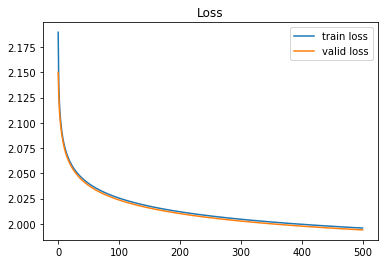

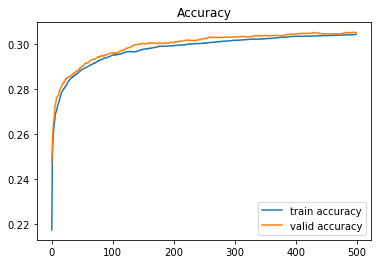

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()